<a href="https://colab.research.google.com/github/sanjana9699/Smart-AI-Resume-Analyzer-Job-Matcher/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [12]:
import os
import tensorflow as tf
import zipfile

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# Define extraction directory
extract_dir = '/tmp/cats_and_dogs_filtered'

# Unzip only if not already unzipped
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/tmp')


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
train_dir = os.path.join(extract_dir, 'train')
validation_dir = os.path.join(extract_dir, 'validation')

print(f'Train directory: {train_dir}')
print(f'Validation directory: {validation_dir}')


Train directory: /tmp/cats_and_dogs_filtered/train
Validation directory: /tmp/cats_and_dogs_filtered/validation


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
EPOCHS = 5

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accuracy: 0.5318 - loss: 0.8526 - val_accuracy: 0.7220 - val_loss: 0.5001
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.8414 - loss: 0.3931 - val_accuracy: 0.9220 - val_loss: 0.2520
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.9019 - loss: 0.2716 - val_accuracy: 0.9540 - val_loss: 0.1546
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.9281 - loss: 0.2100 - val_accuracy: 0.9630 - val_loss: 0.1094
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.9461 - loss: 0.1738 - val_accuracy: 0.9710 - val_loss: 0.0858


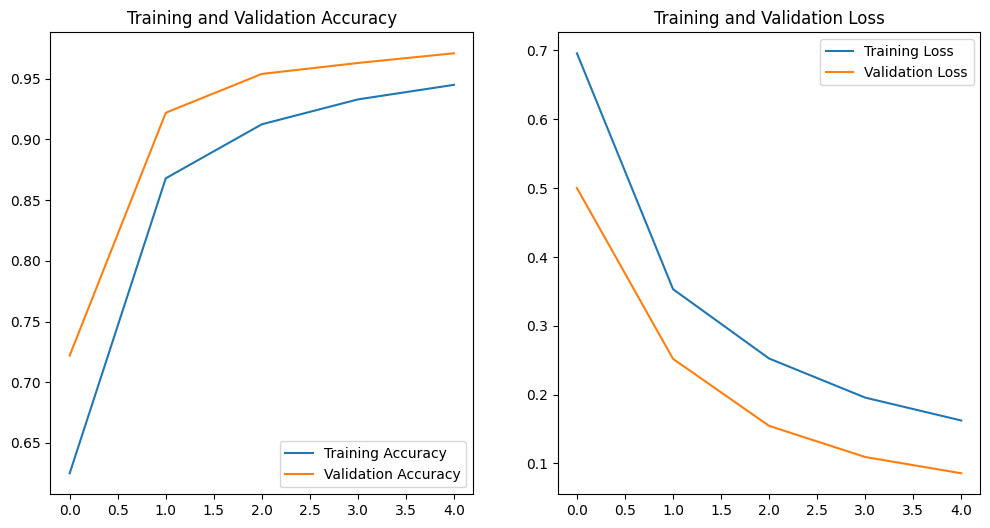

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [20]:
base_model.trainable = True

# Fine-tune from this layer onward
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 5
total_epochs = EPOCHS + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator
)


Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.9478 - loss: 0.1527 - val_accuracy: 0.9740 - val_loss: 0.0743
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9556 - loss: 0.1368 - val_accuracy: 0.9740 - val_loss: 0.0648
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9561 - loss: 0.1244 - val_accuracy: 0.9770 - val_loss: 0.0586
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.9671 - loss: 0.0893 - val_accuracy: 0.9770 - val_loss: 0.0573
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9566 - loss: 0.0993 - val_accuracy: 0.9770 - val_loss: 0.0583
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.9665 - loss: 0.0880 - val_accuracy: 0.9790 - val_loss: 0.0562


In [21]:
model.save("cats_dogs_model.keras")


In [ ]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model('cats_dogs_model.keras')

# Define image size (must match your training input)
IMG_SIZE = (224, 224)

# Prediction function
def predict(img: Image.Image):
    try:
        # Preprocess the image
        img = img.resize(IMG_SIZE)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        score = prediction[0][0]

        # Thresholds to identify unknown images
        if score > 0.85:
            return f"🐶 Dog ({score:.2f} confidence)"
        elif score < 0.15:
            return f"🐱 Cat ({1 - score:.2f} confidence)"
        else:
            return "❓ Unknown Image - Not confidently a cat or dog"
    except Exception as e:
        return f"Error: {str(e)}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Cat vs Dog Image Classifier",
    description="Upload an image to classify it as a Cat, Dog, or Unknown."
)

# Launch the interface
interface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c5f93a2626649d87b8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
